*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#11.-Practical-Methodology" data-toc-modified-id="11.-Practical-Methodology-1">11. Practical Methodology</a></span><ul class="toc-item"><li><span><a href="#11.1-Performance-Metrics" data-toc-modified-id="11.1-Performance-Metrics-1.1">11.1 Performance Metrics</a></span></li><li><span><a href="#11.2-Default-Baseline-Models" data-toc-modified-id="11.2-Default-Baseline-Models-1.2">11.2 Default Baseline Models</a></span></li><li><span><a href="#11.3-Determining-Whether-to-Gather-More-Data" data-toc-modified-id="11.3-Determining-Whether-to-Gather-More-Data-1.3">11.3 Determining Whether to Gather More Data</a></span></li><li><span><a href="#11.4-Selecting-Hyperparameters" data-toc-modified-id="11.4-Selecting-Hyperparameters-1.4">11.4 Selecting Hyperparameters</a></span><ul class="toc-item"><li><span><a href="#Manual-Hyperparameter-Tuning" data-toc-modified-id="Manual-Hyperparameter-Tuning-1.4.1">Manual Hyperparameter Tuning</a></span></li><li><span><a href="#Automatic-Hyperparameter-Optimization-Algorithms" data-toc-modified-id="Automatic-Hyperparameter-Optimization-Algorithms-1.4.2">Automatic Hyperparameter Optimization Algorithms</a></span><ul class="toc-item"><li><span><a href="#Grid-Search" data-toc-modified-id="Grid-Search-1.4.2.1">Grid Search</a></span></li><li><span><a href="#Random-Search" data-toc-modified-id="Random-Search-1.4.2.2">Random Search</a></span></li></ul></li><li><span><a href="#Model-Based-Hyperparameter-Optimization" data-toc-modified-id="Model-Based-Hyperparameter-Optimization-1.4.3">Model-Based Hyperparameter Optimization</a></span></li></ul></li><li><span><a href="#11.5-Debugging-Strategies" data-toc-modified-id="11.5-Debugging-Strategies-1.5">11.5 Debugging Strategies</a></span></li><li><span><a href="#11.6-Example:-Multi-Digit-Number-Recognition" data-toc-modified-id="11.6-Example:-Multi-Digit-Number-Recognition-1.6">11.6 Example: Multi-Digit Number Recognition</a></span></li></ul></li></ul></div>

## 11. Practical Methodology

Syväoppivien menetelmien onnistunut käyttö vaatii myös muutakin, kuin vain tietoa sekä algoritmien kirjosta että siitä, miten mikäkin algoritmi toimii. Syväoppivien menetelmien käyttö on myös käytännöllisiä taitoja vaativaa työtä. Näitä ovat oikean mallin valinta, mallin koulutuksen seurantakyky sekä taito tehdä tarvittavia muutoksia mallin suorituskyvyn parantamiseksi. Samoin se on myös käytännön ohjelmointia.

Monimutkaisen menetelmän huolimattoman implementoinnin sijasta paljon parempia tuloksia saa, mikäli käyttää keskinkertaisia malleja yhdessä huolellisen käytännön toteutuksen, koulutuksen seurannan ja mallin säätämisen kanssa. 

Tässä luvussa käytetään esimerkkinä Googlen Street View -karttapalvelun kehittämistä, jossa konvoluutioverkolla tunnistetaan talojen numeroita ja sidotaan niitä kuvien koordinaatteihin.

Käytännöllinen prosessi etenee esimerkiksi seuraavasti:

1. **Määrittele tavoitteet.** Näitä ovat ongelmaan sopiva virheen mittari ja mitattava kohdearvo.
2. **Rakenna karkea kouluttuva malli.** Tämä pitää sisällään myös datan esikäsittelyn.
3. **Kerää tietoa mallin kriittisistä osista.** Näin pääset käsiksi mahdollisiin pullonkauloihin sekä myös odotettua huonomman suorituskyvyn syihin.
4. **Tee toistuvia pieniä muutoksia.** Ei vain malliin, vaan myös dataan, hyperparametreihin ja jopa algoritmeihin.

### 11.1 Performance Metrics

Suorituskyvyn mittari ja sen odotettu taso määrittävät eniten koko koulutusprosessia. Täydellisiä malleja ei voida kouluttaa sekä teoreettisten syiden että datanäytteiden rajallisuuden vuoksi. Joskus dataa voi olla todella kallista kerätä, toisaalta sitä ei välttämättä ole edes luvallista lisätä (esim. vertailutilanteissa). 

Tavoiteltu suorituskykytaso tulee usein joko aiemmasta tutkimuksesta tai sitten käyttäjäpuolen vaatimuksista. Jälkimmäisiä ovat joko turvallisuuden asettamat rajat, kustannustehokkuus tai käytännöllinen merkityksellisyys. 

Perinteiset virhemittarit, kuten tarkkuus tai absoluuttinen virhe, eivät ole aina riittäviä. Virheet voivat erota toisistaan niiden merkitsevyydessä. Mikäli esimerkiksi merkityksellinen sähköposti luokitellaan roskapostiksi, on kyseessä väärä negatiivinen (*false negative*) luokittelutulos. Tämä voi olla vakavampaa, kuin ilmeisen roskapostin luokittelu merkitykselliseksi, milloin kyseessä on väärä positiviinen (*false positive*) luokittelu. Tämänkaltaisessa tapauksessa virhettä on painotettava sen vakavuudella.

Voi myös olla, että luokiteltavat asiat eivät ole määrällisesti keskenään tasapainossa, esimerkkinä harvinaisen sairauden tunnistaminen. Tällöin kaksi yhdessä käytettävää pätevämpää mittaria ovat täsmällisyys (*precision*) ja oikein luokitellut havainnot (*recall*). Täsmällisyydellä tarkoitetaan oikeiden luokittelutulosten suhdetta kaikkista havainnoista ja oikein luokitelluilla havainnoilla taas oikein luokiteltujen havaintojen osuus.

Tällöin kovakoodatusti tervettä ennustavan mallin täsmällisyys olisi lähes 100%, mutta sen muisti sairauksien osalta olisi 0%. Toisaalta kaikki sairaaksi luokitteleva osuisi täydellisesti kohdalleen oikeissa sairastapauksissa, mutta sen täsmällisyys olisi olematon.

Näitä kahta mittaria käytetään yhdessä PR-kurvin (*PR curve*) muodostamiseen. Kurvi muodostetaan siten, että täsmällisyys on *y*-akselilla ja oikeiden havaintojen osuus *x*-akselilla. Näin oikein luokiteltu havainto saa suurimmat pisteet. Tavallista on ilmoittaa käyrän muodostaman alueen koko. 

Näitä kahta mittaria käyttämällä voidaan laskea myös F-piste (*F-score*)

$$ F = \frac{2pr}{p+r},$$

jossa $p$ on täsmällisyys ja $r$ on oikein luokitellut havainnot.

Joskus on myös hyödyllistä, että malli tuottaa ennusteensa lisäksi myös varmuusarvon. Mikäli varmuusarvo on liian matala, malli voi jättää kokonaan ennustamatta ja antaa päätösvallan asiasta ihmiselle. Näin on luvun esimerkin, Google Street Viewin talon numeroiden tunnistuksen kanssa. Väärät osoitetiedot vaikuttavat vahvan kielteisesti kartan laatuun. Tällöin epävarmat luokittelutulokset on parempi antaa ihmisten luokiteltavaksi.

Näissä tilanteissa hyödyllinen mittari on peittävyys (*coverage*), jolla ilmaistaan varmojen luokittelun suhdetta kaikkiin havaintoihin. Näin saadaan tasapainottava mittari luokittelutarkkuudelle, jota voidaan keinotekoisesti hilata ylös antamalla jokainen havainto ihmisen luokiteltavaksi. Esimerkkitehtävässä tavoitteena oli saavuttaa 98% eli ihmistason luokittelutarkkuus ja 95% peittävyys.

### 11.2 Default Baseline Models

Kun mitattava kohdearvo ja sille sovelias mittari on selvillä, edetään alusta loppuun toimivan karkean perusmallin kehittämiseen mahdollisimman tehokkaasti. Aliluvussa esitellään perusmalleja lähtökohdiksi eri tilanteisiin, mutta aihealueen nopean kehitysvauhdin vuoksi kaikki tiedot eivät välttämättä ole enää ajantasaisia. 

Alussa voi olla jopa suositeltavampaa käyttää ensin perinteisiä mentelmiä syvien sijasta. Mikäli ongelma on tyydyttävästi ratkaistavissa esimerkiksi logistisen regression keinoin, ei syväoppivia menetelmiä tarvita laisin. Mikäli taas ongelma on konekäännöksen, hahmon-, kuvan- tai puheentunnistuksen tai muun vastaavaan kompleksin ongelman alueella, on syvien menetelmien käyttö alusta asti suotavaa.

Ensimmäinen mallin valintaan vaikuttava tekijä ja syöte- ja kohdearvojen tyypit. Mikäli syöte on kiinteän kokoinen vektori ja kuhunkin syötteeseen liittyy tietty kohdearvo tai -luokka, on perinteinen myötäkytketty verkko hyvä lähtökohta. Jos datassa on sekvenssisyyttä, hyvänän lähtökohtana on LSTM. Kuvien kanssa edetään taas konvoluutioverkoilla.

Optimointialgoritmin osalta SGD momentin kanssa on hyvä lähtökohta vaimenevan oppimiskertoimen kanssa. Toinen hyvä vaihtoehto on Adam. Osajoukkojen normalisointi voi vaikuttaa merkittävästikin optimointinopeuteen etenkin sigmoid-funktioita hyödyntävien konvoluutioverkkojen kanssa.

Regularisoinnin osalta aikaisin lopettamista tulisi käyttää lähes aina. Poispudotus on myös hyvä ja helposti käyttöönotettava menetelmä, mutta se voi osoittautua turhaksi yhdessä osajoukkojen normalisoinnin kanssa.

Mikäli ongelmaan liittyvää tutkimusta on jo tehty, on tutkimusten mallien kopiointi todella hyvä lähtökohta. Joskus jopa valmiiksi koulutettuja mallejakin on saatavilla. Joskus koulutus voidaan ohjatun sijaan aloittaa ohjaamattomasti, mutta tämä on tapauskohtaista ja siihen paneudutaan tarkemmin kirjan kolmannessa osassa. Tekstin ja puheen tunnistamisessa tästä on suurtakin hyötyä, kuvien tunnistuksesssa taas ei niinkään. Muussa tapauksessa ohjaamattomien menetelmien käyttö alusta alkaen on suotavaa vain niille sopivisssa ongelmissa.

### 11.3 Determining Whether to Gather More Data

Karkean koulutettavan mallin rakentamisen jälkeen on vuorossa suorituskyvyn mittaus ja sen kehityksen vaatimat toimenpiteet. Monien eri mallien yrittämisen sijaan voi kuitenkin olla parempi pyrkiä ensin keräämään lisää dataa. Merkittävin indikaatio tästä tarpeesta saadaan koulutusvirheestä.

Mikäli koulutusvirhe jää suureksi, ei malli kykene hyödyntämään dataa riittävästi eikä täten lisädatalla ole juuri vaikutuksia. Tällöin mallin kapasiteetin lisääminen kerroksia lisäämällä tai vaikkapa oppimiskerrointa säätämällä voi auttaa. Mikäli tämäkään ei auta, voi jopa data olla itsessään huonolaatuista (kohinaista tai ongelman kanssa korreloimatonta). Tällöin on aloitettava uudelleen datan keruusta.

Jos taas koulutusvirhe pienenee, mitataan suorituskykyä seuraavaksi testivirheen osalta. Sen ollessa hyvä, ei muuta juuri kannata tehdä. Muutoin datan keruu on yksi parhaista vaihtoehdoista kustannustehokkuus huomioiden. Mikäli dataa on helposti saatavilla, on sen keruu aina parempi vaihtoehto muiden rinnalla. Mikäli taas ei, on mallia joko pienennettävä tai regularisoitava. Silloinkin, mikäli vain mitenkään mahdollista, on datan keruu vaihtoehdoista paras.

Kerättävän lisädatan määrää voidaan arvioida erikokoisten koulutussettien virheiden perusteella. Jotta datasetin kasvattamisella on mitään vaikutusti, on kasvatuksen oltava vähintään kertaluokkaa. Datasetin kasvattaminen vain osalla nykyisestä ei vaikuta virheeseen juuri mitenkään, sillä virhettä pienennettäessä koulutusdatasettiä on kasvatettava jopa eksponentiaalisesti.

### 11.4 Selecting Hyperparameters

Kirjan aiemmissa luvuissa on jo mainittu termi hyperparametri. Optimointialgoritmista ja käytetystä mallista riippuen säädettäviä hyperparametreja voi olla useita. Ne vaikuttavat useimmiten mallin koulutuksen etenemiseen ja sen robustisuuteen yhdessä laskennallisten ja muistin resurssien kanssa. Hyperparametrien valinta voidaan jakaa kahteen tapaan, manuaaliseen ja automaattiseen. Manuaalinen asetus vaatii syvempää ymmärrystä, kun taas automaattinen enemmän laskenta-aikaa.

#### Manual Hyperparameter Tuning

Hyperparametrien asettaminen itse vaatii laaja-alaista ymmärrystä hyperparametreista ja niiden suhteesta sekä mallin koulutukseen että käytössä oleviin laskennallisiin resursseihin. Käytännössä tämä tarkoittaa kirjan viidennen luvun asioiden kattavaa ymmärtämistä. Hyperparametrien arvojen etsintä ja asettaminen ylipäätään on optimaalisen mallin käytännöllisen kapasiteetin etsintää suhteessa ratkaistavaan ongelmaan ja sen kompleksisuuteen.

Mallin käytännöllinen kapasiteetti rajoittuu kolmen tekijän yhteisvaikutukseen. Näitä ovat mallin teoreettisen maksimikapasiteetti, käytetyn optimointialgoritmin kohdefunktion minimointikyky ja regularisoinnin aste. Mallia syventämällä voidaan kasvattaa sen maksimikapasiteettia, mutta optimointialgoritmista ja regularisoinnista riippuen parhaimpia datantuottprosesseja mallintavia funktiota ei silti vain näin löydetä.

Yleistysvirheelle määritellään kaksi ääripäätä, jossa toisessa päässä sekä se että koulutusvirhe jäävät riittämättömän korkeiksi. Toisessa ääripäässä yleistys- ja koulutusvirheiden ero on huomattavan suuri. Tällöin ollaan tekemisissä jo aiemminkin käsiteltyjen ali- ja ylisovittumisen kanssa. Eri hyperparametrien arvot vaikuttavat näihin sovittumisen ongelmakohtiin eri suuruusluokissa. 

Esimerkiksi piiloyksiköiden määrän kasvattaminen lisää mallin kapasiteettia ja voi helpommin johtaa ylisovittumiseen. Toinen esimerkki on L2-regularisointi, jonka kasvattaminen taas johta lopulta alisovittumiseen.

Mikäli yksittäinen hyperparametri on diskreetti, ei sillä ole ollenkaan mahdollista käydä läpi koko mahdollista avaruutta. Tällaisia ovat mm. kerrosten ja yksiköiden määrä. Jotkut yksittäiset hyperaparametrit ovat jopa binäärisiä, jolloin yksittäisinä ne kykenevät tutkimaan vain vielä rajoitetumman alueen oppimiskäyrästä. Toiset taas toimivat vain rajoitetuissa tilanteissa - regularisoinnin ottaminen käyttöön jo valmiiksi alisovittuvassa mallissa ei auta mitään.

Yksi merkittävimmistä hyperparametreista on oppimiskerroin (*learnin rate*). Sen tulisi olla ensimmäinen säädettävä, sillä se vaikuttaa mallin käytännölliseen kapasitettiin monimutkaisemmin kuin muut hyperparametrit. Sen oikea arvo määrittyy aina suhteessa malliin ja opittavaan ongelmaan, eikä niinkään arvon magnitudin mukaan. Liian suurena oppimiskerroin voi jopa huonontaa koulutusvirhettä, liian pienenä malli voi jäädä jumiin paikalliseen minimiiin.

Joka tapauksessa hyperparametrien säätö vaatii tarkkailua sekä liittyy aina käytännöllisen kapasiteetin optimointiin. Liian suuren koulutusvirheen ali alisovittumisen kanssa ei useimmiten auta muu, kuin mallin syvyyden ja/tai leveyden kasvatus. Liian suuren testivirheen eli ylisovittumisen kanssa voidaan siirtyä regularisoinnin säätämiseen. Tärkeintä kuitenkin on, että tavoitteena on aina testivirheen pienentäminen.

#### Automatic Hyperparameter Optimization Algorithms

Manuaalisen hyperparametrien säädön sijasta niitä voidaan säätää myös automatisoidusti. Tällöin säädettäville hyperparametreille annetaan jotkin arvorajat, jonka puittessa automaattiset säätöalgoritmit sitten kouluttavat monia eri versioita malleista ja mittaavat eri hyperparametrien kombinaatioiden suorituskykyä. Tällöin ollaan jälleen optimointiongelman parissa, mutta sellaisen, joka on helpompaa säätää yksittäisten arvojen diskreettien arvojen säätämisen sijasta. Paras hyperparametrien kombinaatio on parhaiten kohdefunktion minimoiva kombinaatio.

##### Grid Search

Mikäli hyperparametreja on vähän, kolmen kieppeillä, voidaan säätö toteuttaa taulukkohaulla (*grid search*). Tällöin kullekin säädettävälle hyperparametrille valitaan muutama arvoa, joita sitten kokeillaan keskenään eri kombinaatioissa. Arvojen valinta on kuitenkin manuaalista säätämistä vastaavaa, sillä testattavat arvot on valittava käsin. Eri arvojen suhteen on olemassa joitain osviittaa antavia nyrkkisääntöjä, kuten oppimiskertoimen valinta eri kymmenen potensseista $10^{-1} \text{ ... } 10^{-5}$.

Taulukkohaun käyttö on manuaalista myös sen iteratiivisen käytön vuoksi. Ensin aloitetaan normaalisti karkeimmilla arvoilla, minkä jälkeen testataan parhaimman tuloksen alueen ympäriltä tarkemmin. Näin voisi olla vaikkapa momenttikertoimen kanssa, jota testataan ensin arvoilla $\{0.0, 0.5, 0.9\}$ ja tämän jälkeen parhaimman tuloksen antaneen momenttikertoimen $0.9$ ympäriltä arvoilla $\{0.7, 0.8, 0.9\}$.

Tämän menetelmän ongelmana on kuitenkin sen eksponentiaalisesti kasvavat laskennalliset vaatimukset. Mikäli hyperparametreja on $m$ kappaletta ja niitä jokaista kokeilla $n$ mahdollisen arvon kanssa, on optimaalisen mallin koulutus luokkaa $O(m^n)$. Toki, mikäli mahdollista, toisiinsa lähtökohtaisesti riippumattomia koulutuksia voidaan ajaa kyllä rinnan, mutta laskentatehokkuutta tämäkään ei silti pienennä.

##### Random Search

Taulukkoetsinnän rinnalla toinen varteenotettava vaihtoehto on satunnaishaku. Jokaiselle säädettävälle hyperparametrille määritetään ensin jakauma (jatkuva, diskreetti, binääri), josta kukin hyperparametri voi arvonsa saada. Tällöin hyperparametrien eri kombinaatioita saadaan tehokkaammin tutkittua ja löydettyä jopa mahdollisesti perinteisemmältä taulukkohaulta piiloon jäävät arvot. 

Kirjan kuva 11.2 antaa hyvän intuitiivisen esityksen aiheesta:

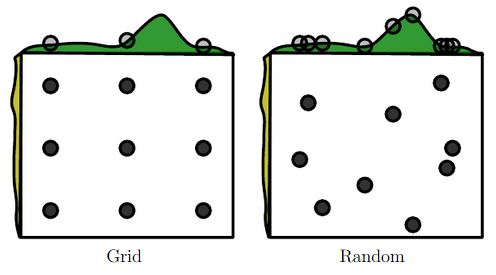

Satunnaishaku on osoittautunut tehokkaammaksi, kuin jäykemmän taulukkohaun "harava" voi olla liian karkea parhaimman suorituskyvyn löytämiseksi.

#### Model-Based Hyperparameter Optimization

Hyperparametrien säätö voidaan hyvin nähdä omana optimointiongelmanaan. Suorituskyvyn mittarina toimii tällöin mallin oma yleistysvirhe. Joissain tapauksissa hyperparametreille voidaan laskea oma gradienttinsa, jolloin hyperparametrit on optimoitavissa laskennallisesti. Käytännössä näin ei kuitenkaan useimmiten ole.

Tällöin voidaan rakentaa Bayesilainen virheseen perustusva regressiomalli, jonka avulla hyperparametreja optimoidaan. Kulloinkin saatavien hyperparametrien arvojen ohella malli tuottaa epävarmuusarvon, jonka mukaan voidaan sitten hyperparametria joko päivittää tai olla päivittämättä. Tämä menettely ottaa pois satunnaisetsintään verraten eksploratiivisuudesta, sillä se painottaa löydettyjä hyvin suorituneita arvoja.

Tämä menettelytapa on kuitenkin vielä tutkimuksen kohteena ja epävarma. Siksi sitä ei suositella ainakana lähtökohtaisesti käytettäväksi. Menetelmä tarvitsee vähintäänkin kertaalleen koulutetun mallin, jotta tällä mallilla voidaan sitten suorittaa vertailuja. Malli on myös koulutettava uudelleen, joskin tähänkin on esitetty tehostavana menetelmänä koulutuksien katkaisu- ja palautusmahdollisuuden lisäämistä.

### 11.5 Debugging Strategies

Koneoppimismallin heikon suorituskyvyn syytä on usein vaikea saada selville. Ensinnäkin mallien käyttäytyminen koulutuksen aikana on yleensä melko epäselvää, sillä niiden eri asioiden välisten yhteyksien muodostamisen tavoitteena on auttaa käyttäjiään saamaan jotain ennalta tuntematonta tietoa. Samoin jonkun tuloksen kelvollisuuden määrittäminen voi olla alussa hankalaa. Koska kompleksit mallit ovat myös komponenttikohtaisesti adaptiivisia, voivat ne jonkun osan toimiessa heikosti saavuttaa silti jokseenkin kelvollisen suorituskyvyn.

Useimmat syiden selvittämisen ja korjaamisen eli debuggauksen keinot keskittyvät näiden ongelmien ratkontaan joko käyttämällä ennalta tunnettuja testitapauksia tai eristämällä verkon osia suorituskykymittausta varten. Tärkeimmät debuggauskeinot kirjan mukaan ovat:

- **Mallin toiminnan tarkastelu.** Aika ajoin on hyvä esimerkiksi visualisoida luokiteltuja kuvia ennustetun luokkansa kanssa, piirtää generoituja kuvia oikeiden vastineidensa päälle tai kuunnella tuotettuja ääniä niiden sisällön varmentamiseksi. Pelkät suorituskykyä mittaavat luvut eivät aina kerro koko totuutta.

- **Virheiden tarkastelu.** Mikäli malli kykenee tuottamaan tietoa myös ulostulonsa varmuudesta, on epävarmimpien tulosten visualisointi hyvä keino päästä käsiksi esimerkiksi datan käsittelyyn liittyviin ongelmiin. Google StreetViewin tapauksessa kuvan rajattiin liian tiukasti, minkä vuoksi malli tuotti tuloksia suuremmalla epävarmuudella.

- **Tutki koulutus- ja testivirhettä.** Hyvin kouluttuva mutta huonon testivirheen antava malli voi olla esimerkiksi väärin implementoitu mallin lataamisen tai testisetin muodostamisen osalta.

- **Sovita pienellä datasetillä.** Yleensä syvät menetelmät kykenevät sovittumaan yksinkertaisiin tapauksiin jo pienillä dataseteillä. Mikäli näin ei tapahdu, voi ongelma olla implementaatiossa.

- **Vahdi aktivointifunktioita ja gradientteja.** Esimerkiksi yhden koulutusjakson (*epoch*) aikana kerätyillä aktivontiufnktioiden arvoilla voidaan päästä ymmärrykseen mahdollisista saturaatioista. Samoin gradienttien ja parametrien suhde tulisi olla prosentin luokkaa, jolloinka malli etenee parametriavaruudessa sopivaa vauhtia. Piirtämällä histogrammeja voidaan päästä käsiksi myös siihen, että mitkä osat verkosta ovat eniten ja vähiten aktiivisia.

Joskus myös oppimisalgoritmit tarjoavat myös tietynlaisia takeita koulutuksen osalta. Tätä käsitellään kirjan kolmannessa osiossa.

### 11.6 Example: Multi-Digit Number Recognition

Viimeiseksi luvussa esitellään luvattua Google StreetView -palvelun numerontunnistusmallin kehitystyötä. Kehitystyö aloitettiin datan keruulla. Googlen kuvausautot keräsivät raakadataa ja ihmiset tuottivat luokittelulle tärkeitä oikeita tietoja eli kohdearvoja. Ennen itse talojen numeroja kuvasta tekstiksi muuntavan mallin kehitystä kehitettiin sekä taloja että niiden seinissä olevia numeroita paikallistavia malleja.


Numeroiden tunnistusmallin kehitys aloitettiin suorituskykymittareiden valinnalla ja mittareille soveltuvan asteikon määrittämisellä. Karttojen tarkkuus on niiden laadun tae, minkä vuoksi myös mallin tarkkuusvaatimus asetettiin korkeaksi 98% eli ihmisen tunnistustarkkuuden tasalle. Tasapainottamaan sallittiin, että varmojen havaintojen suhde kaikkiin havaintohin eli peittävyyden ei tarvitse olla täydellinen. Optimoinnin tuloksena se saatiin 95% tasalle.

Mittareiden jälkeen siirryttiin raakamallin kehityksen pariin. Kuvantunnistuksen vuoksi päädyttiin suoraan konvoluutioverkkoon ReLU- ja numeroiden sekvenssien ennustamiseen soveltuvilla ulostulon *softmax*-yksiköillä. Tämän jälkeen mallia alettiin iteratiivisesti päivittämään. Ensimmäisinä kehitysaskelina malliin lisättiin varmuutta ennustava ulostulo, millä epävarmoja tuloksia voitiin alkaa hylätä.

Tämän jälkeen alettiin selvittää suorituskykyongelmia. Koska koulutus- ja testivirhe olivat lähes identtiset, alettiin selvittää mahdollisen alisovittuvuuden syitä. Koska datasetti oli riittävän suuri, päädyttiin alkaa visualisoimaan virheitä. Näin päästiin käsiksi liian tiukkaan kuvien rajaukseen, minkä vuoksi malli päätyi hylkäämään liiaksi havaintoja. Suuren virittämisen ja säätämisen sijasta päätettiin vain kasvattaa rajausalueen kokoa, minkä seurauksena mallin peittävyys parani huomattavasti.

Vasta aivan viimeiseksi säädettiin hyperparametreja, joilla saavutettiin muutaman prosenttiyksikön parannus. Käytännössä tämä tarkoitti mallin kapasiteetin lisäämistä kokoa kasvattamalla alisovittuvuuteen vedoten.